In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
import json

In [ ]:
#data = pd.read_json('NewestDelhi.json')
with open('NewestDelhi_3.json',encoding = 'utf8') as f:
    data = json.load(f)
    
#for item in data:
#dat = pd.DataFrame(data)

In [3]:
new_delhi = pd.read_json('NewestDelhi.json')

In [ ]:
new_delhi.head()

In [4]:
new_delhi['Review'] = new_delhi['Review'].apply(lambda x : int(str.replace(str.replace(x,',',''),' reviews','')))

In [15]:
new_delhi.head()

,Amenities,Certificates,HType,Max_Price,Min_Price,Name,Ranking,Rating,Review
0,"[Room service, Restaurant, Free High Speed Int...",[Certificate of Excellence],"[Value, Family]",US$153,US$63,"Red Fox Hotel, Delhi Airport",#37 of 980 hotels in New Delhi,4.5,2736
1,"[Spa, Breakfast included, Banquet Room, Breakf...",[Certificate of Excellence],"[Business, Classic]",US$271,US$117,"ITC Maurya, a Luxury Collection Hotel, New Delhi",#7 of 980 hotels in New Delhi,4.5,3922
2,"[Free parking, Restaurant, Free High Speed Int...",[Certificate of Excellence],[],US$105,US$23,Taurus Sarovar Portico,#88 of 980 hotels in New Delhi,4.0,460
3,"[Free High Speed Internet (WiFi), Laundry Serv...",[Certificate of Excellence],"[Modern, Budget]",US$40,US$13,goStops Delhi,"#7 of 1,150 Specialty lodging in New Delhi",4.5,580
4,"[Free parking, Fitness Center with Gym / Worko...","[Travelers' Choice 2019 Winner, Certificate of...","[Business, Great View]",US$362,US$197,The Leela Palace New Delhi,#3 of 980 hotels in New Delhi,5.0,3559


In [5]:
iInd = 0
lst = []
for x in new_delhi['Amenities']:
    for item in x:
        lst.append([iInd,item])
    iInd += 1

In [6]:
t_amen = pd.DataFrame(lst)
t_amen.columns = ['itemno','amenity']

In [ ]:
t_amen.head(20)

In [20]:
t_join = pd.merge(t_amen, new_delhi, how = 'left', left_on = 'itemno', right_index = True)

In [10]:
t_amenity = t_join.groupby('amenity').agg({'Rating':'mean'}).sort_values(by = 'Rating').tail(10)

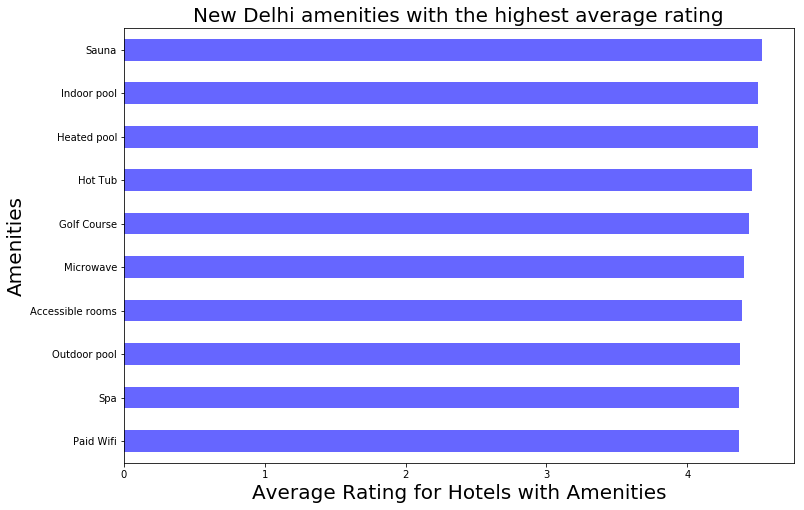

In [68]:
fig = t_amenity.plot.barh(color='blue',figsize=(12,8),legend=False,alpha=.6)

plt.xlabel('Average Rating for Hotels with Amenities',fontsize = 20,family='sans-serif')
plt.ylabel('Amenities',fontsize = 20,family='sans-serif')
plt.title('New Delhi amenities with the highest average rating',fontsize = 20,family='sans-serif')
plt.show()

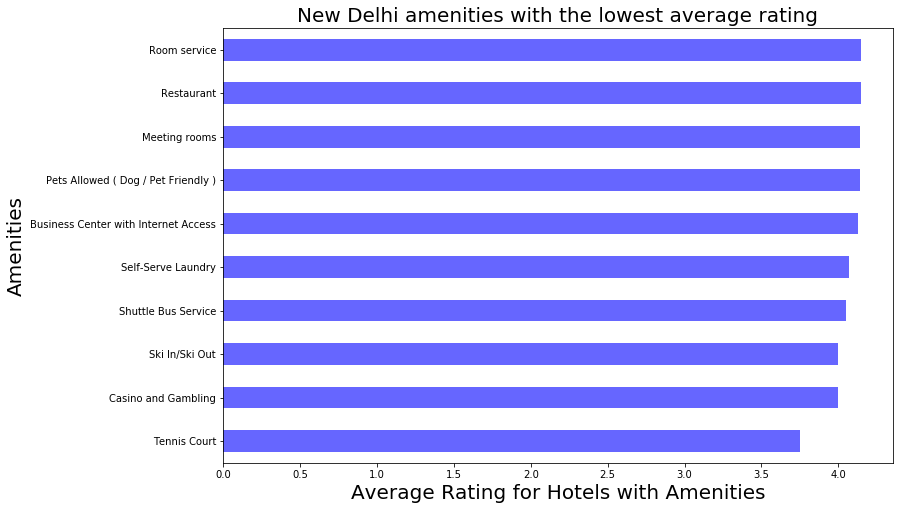

In [69]:
t_amenity2 = t_join.groupby('amenity').agg({'Rating':'mean'}).sort_values(by = 'Rating').head(10)
fig = t_amenity2.plot.barh(color='blue',figsize=(12,8),legend=False,alpha=.6)

plt.xlabel('Average Rating for Hotels with Amenities',fontsize = 20,family='sans-serif')
plt.ylabel('Amenities',fontsize = 20,family='sans-serif')
plt.title('New Delhi amenities with the lowest average rating',fontsize = 20,family='sans-serif')
plt.show()

In [16]:
iInd = 0
lst2 = []
for x in new_delhi['HType']:
    for item in x:
        lst.append([iInd,item])
    iInd += 1

In [18]:
t_htype = pd.DataFrame(lst)
t_htype.columns = ['itemno','hotel_type']

In [21]:
t_join2 = pd.merge(t_htype, new_delhi, how = 'left', left_on = 'itemno', right_index = True)

In [77]:
t_type = t_join2.groupby('hotel_type').agg({'Rating':'mean'}).sort_values(by = 'Rating').tail(10)

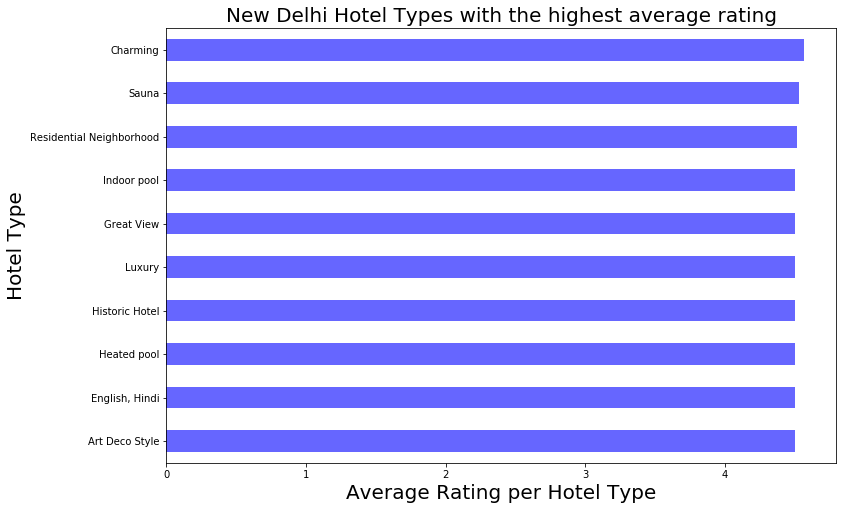

In [78]:
fig = t_type.plot.barh(color='blue',figsize=(12,8),legend=False,alpha=.6)

plt.xlabel('Average Rating per Hotel Type',fontsize = 20,family='sans-serif')
plt.ylabel('Hotel Type',fontsize = 20,family='sans-serif')
plt.title('New Delhi Hotel Types with the highest average rating',fontsize = 20,family='sans-serif')
plt.show()

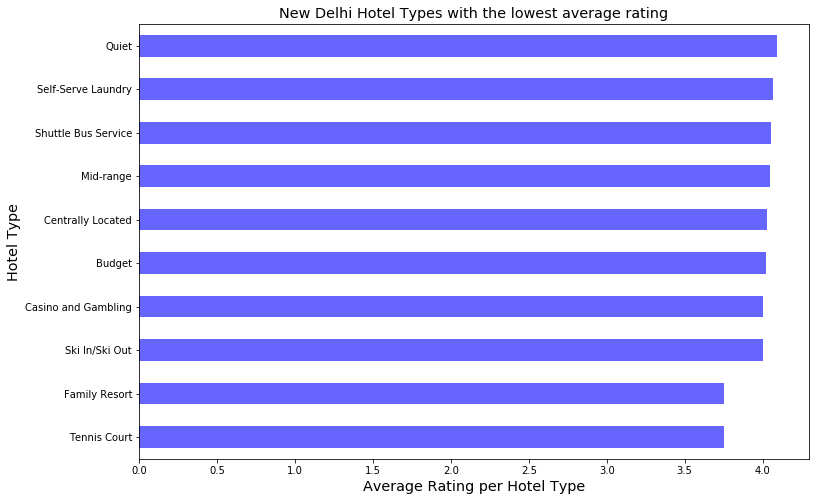

In [75]:
t_type = t_join2.groupby('hotel_type').agg({'Rating':'mean'}).sort_values(by = 'Rating').head(10)

fig = t_type.plot.barh(color='blue',figsize=(12,8),legend=False,alpha=.6)

plt.xlabel('Average Rating per Hotel Type',size='x-large',family='sans-serif')
plt.ylabel('Hotel Type',size='x-large',family='sans-serif')
plt.title('New Delhi Hotel Types with the lowest average rating',size='x-large',family='sans-serif')
plt.show()

,Rating
hotel_type,
Tennis Court,3.750000
Family Resort,3.750000
Ski In/Ski Out,4.000000
Casino and Gambling,4.000000
Budget,4.018519
Centrally Located,4.031250
Mid-range,4.048387
Shuttle Bus Service,4.052239
Self-Serve Laundry,4.067308


In [44]:
new_delhi['cnt_amen'] = new_delhi['Amenities'].apply(lambda x: len(x))

In [45]:
new_delhi.head()

,Amenities,Certificates,HType,Max_Price,Min_Price,Name,Ranking,Rating,Review,cnt_amen
0,"[Room service, Restaurant, Free High Speed Int...",[Certificate of Excellence],"[Value, Family]",US$153,US$63,"Red Fox Hotel, Delhi Airport",#37 of 980 hotels in New Delhi,4.5,2736,24
1,"[Spa, Breakfast included, Banquet Room, Breakf...",[Certificate of Excellence],"[Business, Classic]",US$271,US$117,"ITC Maurya, a Luxury Collection Hotel, New Delhi",#7 of 980 hotels in New Delhi,4.5,3922,15
2,"[Free parking, Restaurant, Free High Speed Int...",[Certificate of Excellence],[],US$105,US$23,Taurus Sarovar Portico,#88 of 980 hotels in New Delhi,4.0,460,22
3,"[Free High Speed Internet (WiFi), Laundry Serv...",[Certificate of Excellence],"[Modern, Budget]",US$40,US$13,goStops Delhi,"#7 of 1,150 Specialty lodging in New Delhi",4.5,580,6
4,"[Free parking, Fitness Center with Gym / Worko...","[Travelers' Choice 2019 Winner, Certificate of...","[Business, Great View]",US$362,US$197,The Leela Palace New Delhi,#3 of 980 hotels in New Delhi,5.0,3559,35


Text(0.5, 1.0, 'Distribution of Ratings by number of Amenities')

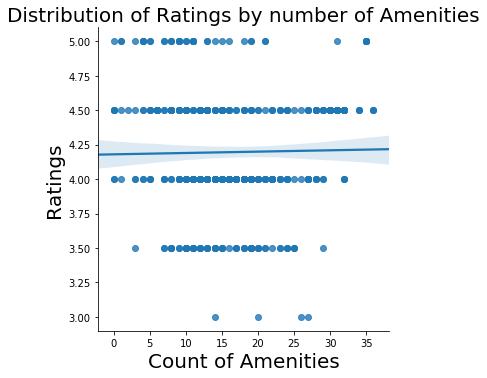

In [61]:
sns.lmplot('cnt_amen','Rating',new_delhi)
plt.xlabel('Count of Amenities',fontsize=20,family='sans-serif')
plt.ylabel('Ratings',fontsize=20,family='sans-serif')
plt.title('Distribution of Ratings by number of Amenities',fontsize=20,family='sans-serif')

[Text(0, 0.5, 'PDF'),
 Text(0.5, 0, 'Number of Amenities'),
 Text(0.5, 1.0, 'Distribution of Number of  Amenites')]

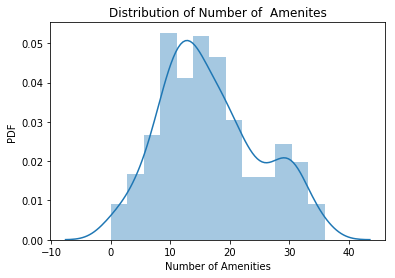

In [74]:
ax = sns.distplot(new_delhi['cnt_amen'])
ax.set(xlabel = 'Number of Amenities', ylabel = 'PDF', title = 'Distribution of Number of  Amenites')